In [561]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


In [562]:
def map_range(value, min_=0, max_=1):
        return ((value-np.min(value))/(np.max(value)-np.min(value))) * (max_ - min_)


In [563]:
n = np.array([[0],[1]])
n=n.repeat(10,1)
print(n)


[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]]


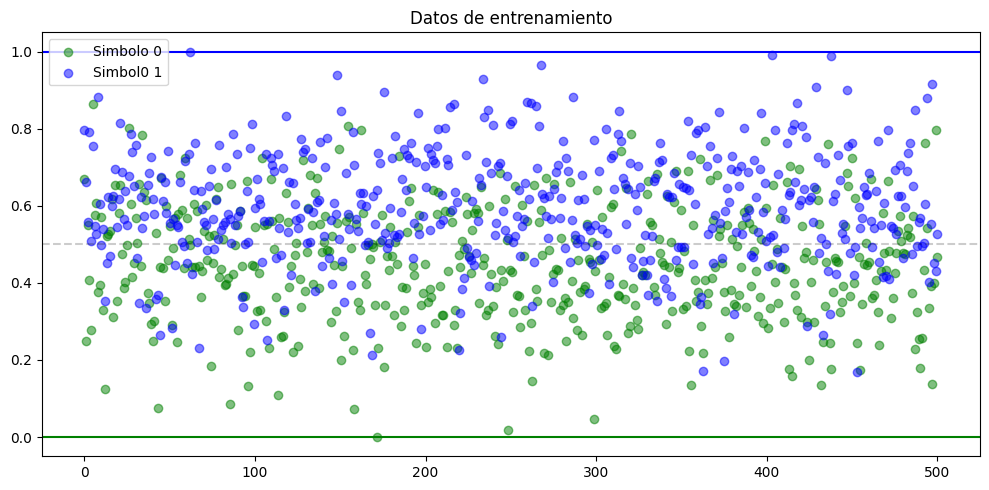

In [564]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 500 # Muestras de tiempo por símbolo

o2 = 1
noise = np.random.normal(0,o2,2*Nsamples)

simbol_a0 = [a0]*Nsamples
simbol_a1 = [a1]*Nsamples

message_org = map_range(np.array([simbol_a0, 
                        simbol_a1]))

message_corrupt = map_range(np.array([simbol_a0+noise[:Nsamples],                         
                            simbol_a1+noise[Nsamples:]]))

time = np.linspace(0,Nsamples,Nsamples)

plt.figure(figsize=(10,5),tight_layout=True) 
plt.title("Datos de entrenamiento")
plt.scatter(time,message_corrupt[0],color='green', alpha=0.5, label=f'Simbolo {a0}' )
plt.scatter(time,message_corrupt[1],color='blue', alpha=0.5, label=f'Simbol0 {a1}')
plt.axhline(a0, color='green', linestyle='-')
plt.axhline(a1, color='blue', linestyle='-')
plt.axhline((a0+a1)/2, color=(0,0,0,0.2), linestyle='--')  
plt.legend()
plt.show()

In [565]:

entrada = tf.keras.layers.Dense(units=100, input_shape=(Nsamples,))
capa1   = tf.keras.layers.Dense(units=50, activation='relu')
capa2   = tf.keras.layers.Dense(units=25, activation='relu')
capa3   = tf.keras.layers.Dense(units=10, activation='relu')
salida  = tf.keras.layers.Dense(units=1, activation='sigmoid')
modelo  = tf.keras.Sequential([entrada, capa1, capa2,capa3, salida])


# Compilación del modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               loss=tf.keras.losses.mean_squared_error,
               metrics=['accuracy']
              )

historial=modelo.fit(message_corrupt, message_org, epochs=70) #validation_data=()

#loss, accuracy = modelo.evaluate(X_test, y_test)

#print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predecir y evaluar los resultados
y_pred_test = modelo.predict(message_corrupt)
print(y_pred_test)




Epoch 1/70
1/1 [==============================] - 1s 1s/step - loss: 0.3029 - accuracy: 0.5000
Epoch 2/70
1/1 [==============================] - 0s 8ms/step - loss: 0.2349 - accuracy: 0.5000
Epoch 3/70
1/1 [==============================] - 0s 8ms/step - loss: 0.2022 - accuracy: 1.0000
Epoch 4/70
1/1 [==============================] - 0s 8ms/step - loss: 0.1725 - accuracy: 1.0000
Epoch 5/70
1/1 [==============================] - 0s 9ms/step - loss: 0.1446 - accuracy: 1.0000
Epoch 6/70
1/1 [==============================] - 0s 11ms/step - loss: 0.1233 - accuracy: 1.0000
Epoch 7/70
1/1 [==============================] - 0s 9ms/step - loss: 0.1013 - accuracy: 1.0000
Epoch 8/70
1/1 [==============================] - 0s 10ms/step - loss: 0.0784 - accuracy: 1.0000
Epoch 9/70
1/1 [==============================] - 0s 10ms/step - loss: 0.0519 - accuracy: 1.0000
Epoch 10/70
1/1 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 1.0000
Epoch 11/70
1/1 [===================

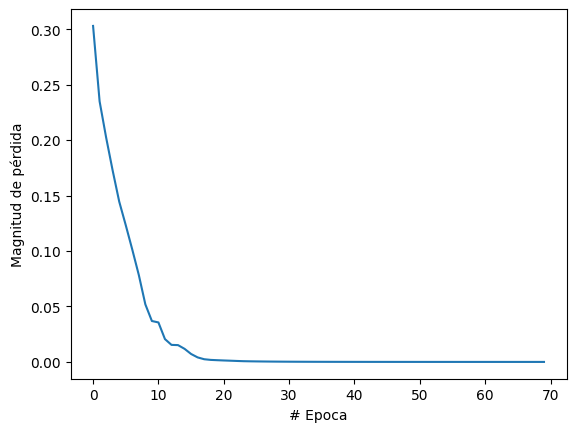

In [566]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 26ms/step


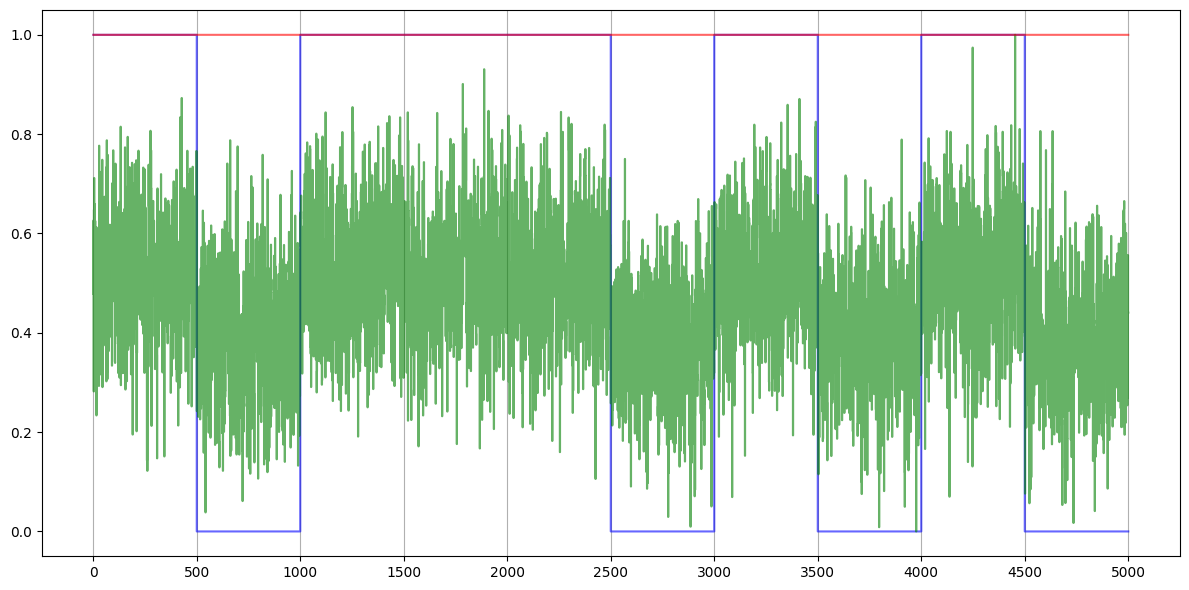

In [588]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0

# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

Nsymbols = 10 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

o3 = 1
noise_test = np.random.normal(0, o3, N)
time = np.linspace(0, N, N)

data_test = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
message_test_orig = np.concatenate([[v]*Nsamples for v in data_test])
message_test_corrupt = message_test_orig + noise_test

#message_test_orig = map_range(message_test_orig)
message_test_corrupt = map_range(message_test_corrupt)

message_test_corrupt = np.array(np.split(message_test_corrupt, Nsymbols))

message_predict = modelo.predict(message_test_corrupt)
message_predict = message_predict.flatten()
message_predict = np.where(message_predict >= 0.5, 1, 0)
message_predict = np.array([[x]*Nsamples for x in message_predict])
message_predict = message_predict.flatten()
 
plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_test_orig, '-b', label='Señal Original', alpha=0.6)
plt.step(time,message_test_corrupt.flatten(), '-g', label='Señal Corrupta', alpha=0.6)
plt.step(time,message_predict, '-r', label='Señal Recuperada', alpha=0.6)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(Nsamples))
plt.grid(axis='x')  # Solo cuadrícula vertical
plt.show()



In [568]:
simbol = 0
simbol = [simbol]*Nsamples
message_predict = modelo.predict([simbol])
print(message_predict) 

1/1 [==============================] - 0s 128ms/step
[[0.48062423]]


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.01937577,  0.08062423,  0.18062423,  0.28062424,  0.38062423,
         0.48062423,  0.58062422,  0.68062425,  0.78062421,  0.88062423,
         0.9806242 ]),
 <BarContainer object of 10 artists>)

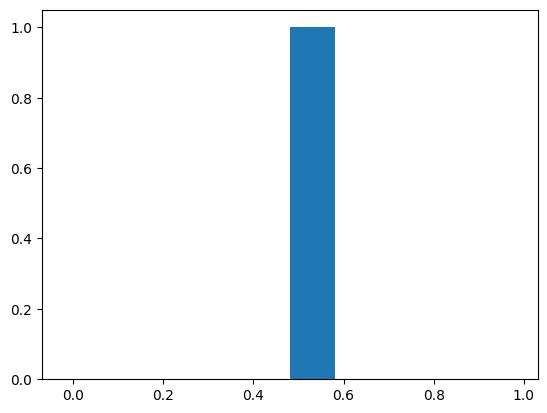

In [569]:
plt.hist(message_predict)